In [1]:

import numpy as np
import matplotlib.pyplot as plt



## Simple Function: \(f(x) = x^2\)

Let's start by defining a simple quadratic function and its gradient. We'll then visualize this function.


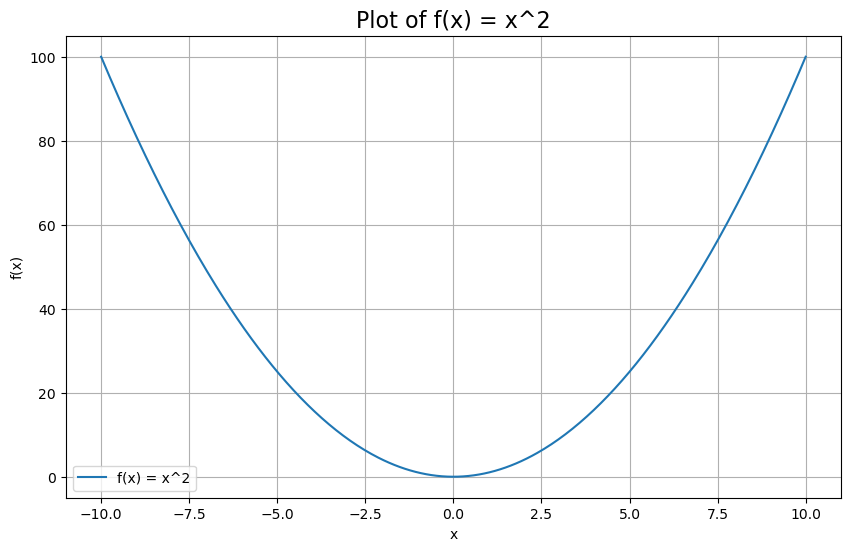

In [2]:

def f(x):
    return x**2

def gradient(x):
    return 2*x

x = np.linspace(-10, 10, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^2')
plt.title('Plot of f(x) = x^2', fontsize=16)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()



## Gradient Descent on \(f(x) = x^2\)

In this demonstration, we'll perform gradient descent on the quadratic function to locate its minimum. Not only will we visualize the steps taken during the gradient descent process, but we'll also showcase the tangent lines at selected points. These tangent lines give insights into the slope or gradient at those specific points, helping to illustrate how the gradient descent algorithm determines the direction and magnitude of each step.

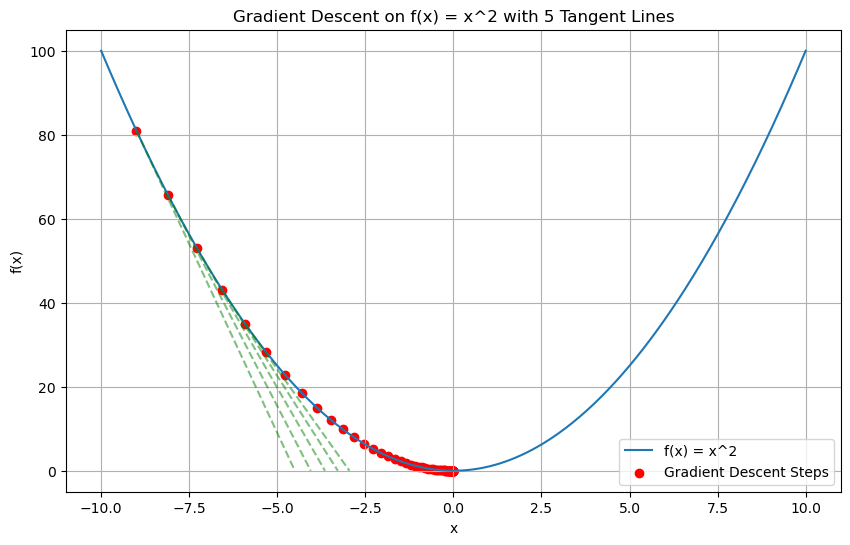

In [3]:
def gradient_descent(starting_point, learning_rate, n_iterations, function, gradient_function):
    x_history = [starting_point]
    x_current = starting_point
    
    for i in range(n_iterations):
        gradient_at_x = gradient_function(x_current)
        x_current = x_current - learning_rate * gradient_at_x
        x_history.append(x_current)
        
    return x_history

def tangent_line_segment(x0, function, gradient_function):
    m = gradient_function(x0)
    x_intercept = x0 - function(x0) / m
    
    x_values = np.linspace(x0, x_intercept, 100)
    y_values = m * (x_values - x0) + function(x0)
    
    return x_values, y_values

starting_point = -9
learning_rate = 0.05
n_iterations = 100

x_history = gradient_descent(starting_point, learning_rate, n_iterations, f, gradient)

# Variable to adjust the number of tangents
num_tangents = 5

# Generate x values for plotting
x = np.linspace(-10, 10, 400)
y = f(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='f(x) = x^2')
plt.scatter(x_history, f(np.array(x_history)), color='red', label='Gradient Descent Steps')

# Plot tangent line segments based on num_tangents
for x0 in x_history[:num_tangents]:  
    x_tangent, y_tangent = tangent_line_segment(x0, f, gradient)
    plt.plot(x_tangent, y_tangent, 'g--', alpha=0.5)  # The 'g--' makes the line green and dashed

plt.title(f'Gradient Descent on f(x) = x^2 with {num_tangents} Tangent Lines')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Effect of Learning Rates

We'll now experiment with different learning rates for gradient descent on \(f(x) = x^2\) to see how the learning rate influences convergence.


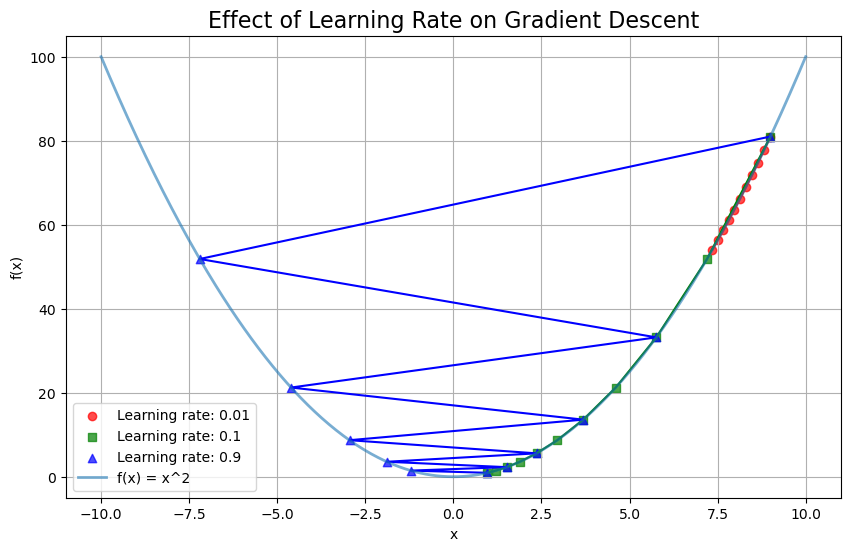

In [4]:

learning_rates = [0.01, 0.1, 0.9]


colors = ["red", "green", "blue"]
markers = ["o", "s", "^"]

plt.figure(figsize=(10, 6))

for i, lr in enumerate(learning_rates):
    x_history = gradient_descent(9, lr, 10, f, gradient)
    plt.scatter(x_history, f(np.array(x_history)), color=colors[i], marker=markers[i], alpha=0.7, label=f'Learning rate: {lr}')
    plt.plot(x_history, f(np.array(x_history)), color=colors[i], linewidth=1.5)

# Plot the function
plt.plot(x, y, label='f(x) = x^2', alpha=0.6, linewidth=2)

# Enhance the title and labels
plt.title('Effect of Learning Rate on Gradient Descent', fontsize=16)
plt.xlabel('x')
plt.ylabel('f(x)')

# Adjust the legend position
plt.legend()

# Show the grid and the plot
plt.grid(True)
plt.show()



## A More Complex Function: \(f(x) = x^4 - 8x^2 + 5\)

Let's now consider a more complex function with multiple local minima. We'll visualize the function and perform gradient descent from different starting points to understand the concept of local minima.


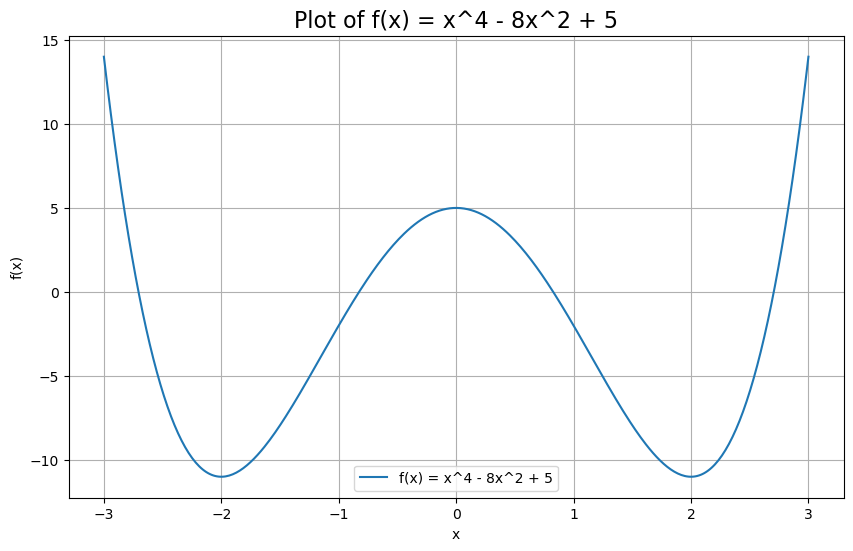

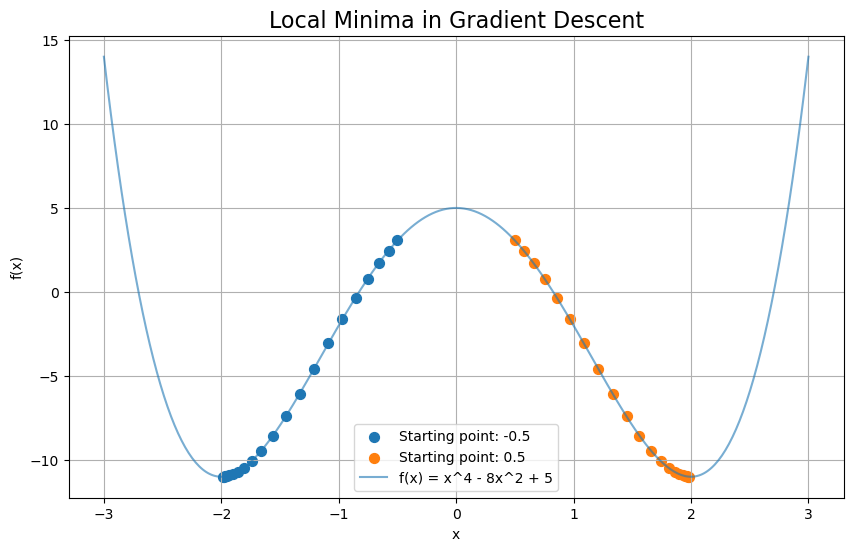

In [5]:

def f_complex(x):
    return x**4 - 8*x**2 + 5

def gradient_complex(x):
    return 4*x**3 - 16*x

x_complex = np.linspace(-3, 3, 400)
y_complex = f_complex(x_complex)

plt.figure(figsize=(10, 6))
plt.plot(x_complex, y_complex, label='f(x) = x^4 - 8x^2 + 5')
plt.title('Plot of f(x) = x^4 - 8x^2 + 5', fontsize=16)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

starting_points = [-0.5, 0.5]

plt.figure(figsize=(10, 6))

for sp in starting_points:
    x_history = gradient_descent(sp, 0.01, 20, f_complex, gradient_complex)
    plt.scatter(x_history, f_complex(np.array(x_history)), marker='o', s=50, label=f'Starting point: {sp}')

plt.plot(x_complex, y_complex, label='f(x) = x^4 - 8x^2 + 5', alpha=0.6)
plt.title('Local Minima in Gradient Descent', fontsize=16)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
